### Group 6 Interim Deliverable Metric Calculation
#### DSO 570: Professor Peng Shi
#### Due: 3/6/18 by 12:30 p.m.

First, we imported all relevant datasets for the metric calculation

In [5]:
import pandas as pd
student_course = pd.read_excel('./Blackboard Content/Student_Course_Selection_1516.xlsx', sheetname=0)
session_codes = pd.read_excel('./Blackboard Content/Summary_Special_Session_Codes_1516_1617.xlsx', sheetname=0)
dept_allocations = pd.read_excel('./Blackboard Content/Department_Allocations_20171.xlsx', sheetname=0)
course_enrollment = pd.read_excel('./Blackboard Content/Marshall_Course_Enrollment_1516_1617.xlsx', sheetname=0)
room_capacity = pd.read_excel('./Blackboard Content/Marshall_Room_Capacity_Chart.xlsx', sheetname=0)
cancelled_courses = pd.read_excel('./Blackboard Content/Cancelled_Courses_1516_1617.xlsx', sheetname=0)

Next, we merged the course enrollment and room capacity files to calculate the ratio between the number of students enrolled, and filled capacity. We dropped all classes with non available room size data. This included online courses, international courses, and courses that met in the office.

In [68]:
enrolled = course_enrollment.loc[:,('Reg Count', 'First Room', 'Session', 'Term')] 
courseRatio = pd.merge(enrolled, room_capacity,  how='left', left_on=['First Room'], right_on = ['Room'])
courseRatio = courseRatio.loc[:,('Session', 'Reg Count', 'First Room', 'Room', 'Size', 'Term')]
courseRatio = courseRatio.dropna(subset=['Size']) 

Finally, we calculated the capacity ratio by summing the total enrollments by the total capacity. We did it this way as opposed to averaging the capacity ratio across every course because taking the mean will be skewed by smaller course sizes. The summation method favors the larger courses and thus the greater population. The overall capacity ratio is as follows:

In [69]:
capacityRatio = courseRatio.loc[:,'Reg Count'].sum()/courseRatio.loc[:,'Size'].sum()
print('The current capacity ratio is: {0}'.format(capacityRatio))

The current capacity ratio is: 0.6821620705722878


When examining the trend of the capacity ratio across terms, we see that summer terms utilize capacity the best while there is a slight decrease from the fall to the spring term. We can see that both tabularly and graphically.

In [82]:
capacityRatio = courseRatio.groupby(['Term'])['Reg Count'].sum()/courseRatio.groupby(['Term'])['Size'].sum()
capacityRatio = pd.DataFrame({'Term':capacityRatio.index, 'CapacityRatio':capacityRatio.values})
capacityRatio

,CapacityRatio,Term
0,0.711227,20153
1,0.657928,20161
2,0.621945,20162
3,0.701406,20163
4,0.669520,20171
5,0.659848,20172


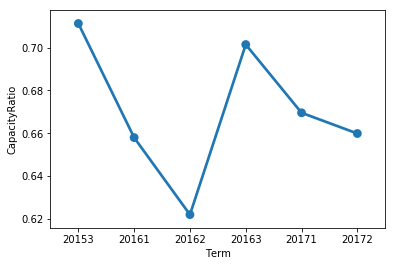

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pointplot(x = 'Term', y = 'CapacityRatio', data = capacityRatio)
plt.show()